# Goals

 - Evaluate the performance of the non-human/mouse STAR references

# Var

In [177]:
work_dir = "/scratch/multiomics/nickyoungblut/scRecounter/acc_all-org"
all_org_input = "../../data/accessions_all-org.csv"

# Init

In [178]:
import os
import pandas as pd
import plotnine as pn
from glob import glob

In [179]:
# set plotnine theme to bw
pn.theme_set(pn.theme_bw())

# Load

### scRecounter input

In [180]:
df_input = pd.read_csv(all_org_input)
df_input

,sample,accession,entrez_id,organism
0,SRX20288331,SRR24503416,27709479,Anopheles_gambiae
1,SRX19498702,SRR23613944,26779668,Arabidopsis_thaliana
2,SRX19992927,SRR24196182,26767425,Bos_taurus
3,SRX27335695,SRR31980676,36879050,Caenorhabditis_elegans
4,SRX23995681,SRR28390731,32301733,Callithrix_jacchus
5,SRX24164706,SRR28565449,32475612,Canis_lupus_familiaris
6,SRX26737879,SRR31364130,36125471,Danio_rerio
7,ERX5671941,ERR6032665,15014737,Drosophila_melanogaster
8,SRX26348969,SRR30946435,35575331,Equus_caballus
9,SRX21269173,SRR25539693,28706133,Gallus_gallus


In [181]:
# number of organisms
len(df_input["organism"].unique())

22

In [182]:
# get number of samples per organism
df_input.groupby("organism").size()

organism
Anopheles_gambiae          1
Arabidopsis_thaliana       4
Bos_taurus                 2
Caenorhabditis_elegans     4
Callithrix_jacchus         2
Canis_lupus_familiaris     2
Danio_rerio                2
Drosophila_melanogaster    4
Equus_caballus             4
Gallus_gallus              4
Gorilla_gorilla            2
Heterocephalus_glaber      2
Oryctolagus_cuniculus      2
Oryza_sativa               2
Ovis_aries                 2
Pan_troglodytes            4
Rattus_norvegicus          2
Schistosoma_mansoni        2
Solanum_lycopersicum       2
Sus_scrofa                 2
Xenopus_tropicalis         1
Zea_mays                   2
dtype: int64

In [183]:
# duplicate samples?
df_input.groupby("sample").size().describe()

count    54.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
dtype: float64

### scRecounter STAR params

In [184]:
# set path
p = os.path.join(work_dir, "STAR/*/*/merged_star_params.csv")

# read in
df_star_params = []
for infile in glob(p):
    df_star_params.append(pd.read_csv(infile))

# concat
df_star_params = pd.concat(df_star_params)
df_star_params

,sample,accession,strand,barcodes_name,barcodes_file,cell_barcode_length,umi_length,organism,star_index,Estimated Number of Cells,...,Total GeneFull Detected,UMIs in Cells,Unique Reads in Cells Mapped to GeneFull,read1_length,read2_length,spot_count,base_count,file_size_gb,Total Estimated Number of Cells,Best parameters
0,SRX26348970,SRR30946434,Reverse,3M-3pgex-may-2023,/common_datasets/external/references/cellrange...,16,12,Equus_caballus,/scratch/multiomics/nickyoungblut/star_refs/Eq...,1.321000e+03,...,4.236000e+03,1.227800e+04,1.318900e+04,151,151,239469695,77109241790,30.432775,19660,NaN
1,SRX26348970,SRR30946434,Forward,737K-august-2016,/common_datasets/external/references/cellrange...,16,10,Equus_caballus,/scratch/multiomics/nickyoungblut/star_refs/Eq...,4.390000e+02,...,2.805000e+03,5.996000e+03,6.440000e+03,151,151,239469695,77109241790,30.432775,6578,NaN
2,SRX26348970,SRR30946434,Forward,3M-5pgex-jan-2023,/common_datasets/external/references/cellrange...,16,12,Equus_caballus,/scratch/multiomics/nickyoungblut/star_refs/Eq...,6.200000e+02,...,3.617000e+03,8.762000e+03,9.425000e+03,151,151,239469695,77109241790,30.432775,9071,NaN
3,SRX26348970,SRR30946434,Reverse,737K-august-2016,/common_datasets/external/references/cellrange...,16,10,Equus_caballus,/scratch/multiomics/nickyoungblut/star_refs/Eq...,4.710000e+02,...,1.850000e+03,3.524000e+03,3.795000e+03,151,151,239469695,77109241790,30.432775,6871,NaN
4,SRX26348970,SRR30946434,Reverse,3M-5pgex-jan-2023,/common_datasets/external/references/cellrange...,16,12,Equus_caballus,/scratch/multiomics/nickyoungblut/star_refs/Eq...,7.930000e+02,...,2.532000e+03,5.523000e+03,5.937000e+03,151,151,239469695,77109241790,30.432775,11741,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,ERX4639423,ERR4769579,Forward,3M-february-2018,/common_datasets/external/references/cellrange...,16,12,Schistosoma_mansoni,/scratch/multiomics/nickyoungblut/star_refs/Sc...,2.373602e+11,...,6.076421e+13,1.633544e+16,6.553800e+04,26,98,62945639,7805259236,3.993945,14940788541714,False
6,ERX4639423,ERR4769579,Reverse,737K-arc-v1,/common_datasets/external/references/cellrange...,16,12,Schistosoma_mansoni,/scratch/multiomics/nickyoungblut/star_refs/Sc...,2.373602e+11,...,6.076421e+13,1.633544e+16,6.553800e+04,26,98,62945639,7805259236,3.993945,14940788541714,False
7,ERX4639423,ERR4769579,Reverse,3M-5pgex-jan-2023,/common_datasets/external/references/cellrange...,16,12,Schistosoma_mansoni,/scratch/multiomics/nickyoungblut/star_refs/Sc...,3.472328e+18,...,3.472328e+18,3.184666e+18,3.472328e+18,26,98,62945639,7805259236,3.993945,-9223372036854775808,False
8,ERX4639423,ERR4769579,Forward,3M-3pgex-may-2023,/common_datasets/external/references/cellrange...,16,12,Schistosoma_mansoni,/scratch/multiomics/nickyoungblut/star_refs/Sc...,2.135981e+11,...,5.777580e+13,9.246893e+14,6.579300e+04,26,98,62945639,7805259236,3.993945,13445071567176,False


# Summary

In [185]:
# number of records per organism
df_star_params.groupby("organism").size()

organism
Anopheles_gambiae          10
Arabidopsis_thaliana       40
Bos_taurus                 20
Caenorhabditis_elegans     40
Callithrix_jacchus         40
Canis_lupus_familiaris     20
Danio_rerio                20
Drosophila_melanogaster    20
Equus_caballus             40
Gallus_gallus              40
Gorilla_gorilla            20
Heterocephalus_glaber      20
Oryctolagus_cuniculus      20
Oryza_sativa               20
Ovis_aries                 20
Pan_troglodytes            40
Rattus_norvegicus          20
Schistosoma_mansoni        20
Solanum_lycopersicum       20
Sus_scrofa                 20
Xenopus_tropicalis         10
Zea_mays                   20
dtype: int64

In [186]:
# number of records per organism and sample
df_star_params.groupby(["organism","sample"]).size()

organism                 sample     
Anopheles_gambiae        SRX20288331    10
Arabidopsis_thaliana     SRX16110572    10
                         SRX16110579    10
                         SRX19498702    10
                         SRX19498738    10
Bos_taurus               SRX17163012    10
                         SRX19992927    10
Caenorhabditis_elegans   SRX19885394    10
                         SRX20684355    10
                         SRX27335695    10
                         SRX27335698    10
Callithrix_jacchus       ERX12105533    10
                         ERX6599073     10
                         ERX9648260     10
                         SRX23995681    10
Canis_lupus_familiaris   SRX17820910    10
                         SRX24164706    10
Danio_rerio              SRX22195232    10
                         SRX26737879    10
Drosophila_melanogaster  SRX15014603    10
                         SRX24172447    10
Equus_caballus           SRX23498637    10
                 

In [187]:
# anti-join to get missing samples
missing = (df_input
        .merge(df_star_params, on=["organism","sample"], how="left", indicator=True)
        .query('_merge == "left_only"')
        .drop(columns=['_merge'])
    )[["organism","sample"]]
missing

,organism,sample
70,Drosophila_melanogaster,ERX5671941
461,Drosophila_melanogaster,ERX5671946


## Stats

In [188]:
df_star_params.columns

Index(['sample', 'accession', 'strand', 'barcodes_name', 'barcodes_file',
       'cell_barcode_length', 'umi_length', 'organism', 'star_index',
       'Estimated Number of Cells', 'Fraction of Unique Reads in Cells',
       'Mean GeneFull per Cell', 'Mean Reads per Cell', 'Mean UMI per Cell',
       'Median GeneFull per Cell', 'Median Reads per Cell',
       'Median UMI per Cell', 'Number of Reads', 'Q30 Bases in CB+UMI',
       'Q30 Bases in RNA read', 'Reads Mapped to GeneFull: Unique GeneFull',
       'Reads Mapped to GeneFull: Unique+Multiple GeneFull',
       'Reads Mapped to Genome: Unique',
       'Reads Mapped to Genome: Unique+Multiple', 'Reads With Valid Barcodes',
       'Sequencing Saturation', 'Total GeneFull Detected', 'UMIs in Cells',
       'Unique Reads in Cells Mapped to GeneFull', 'read1_length',
       'read2_length', 'spot_count', 'base_count', 'file_size_gb',
       'Total Estimated Number of Cells', 'Best parameters'],
      dtype='object')

In [189]:
# missing organisms?
df_input[~df_input["organism"].isin(df_star_params["organism"])][["organism"]].drop_duplicates()

,organism


/home/nickyoungblut/miniforge3/envs/tiledb/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 48 rows containing non-finite values.


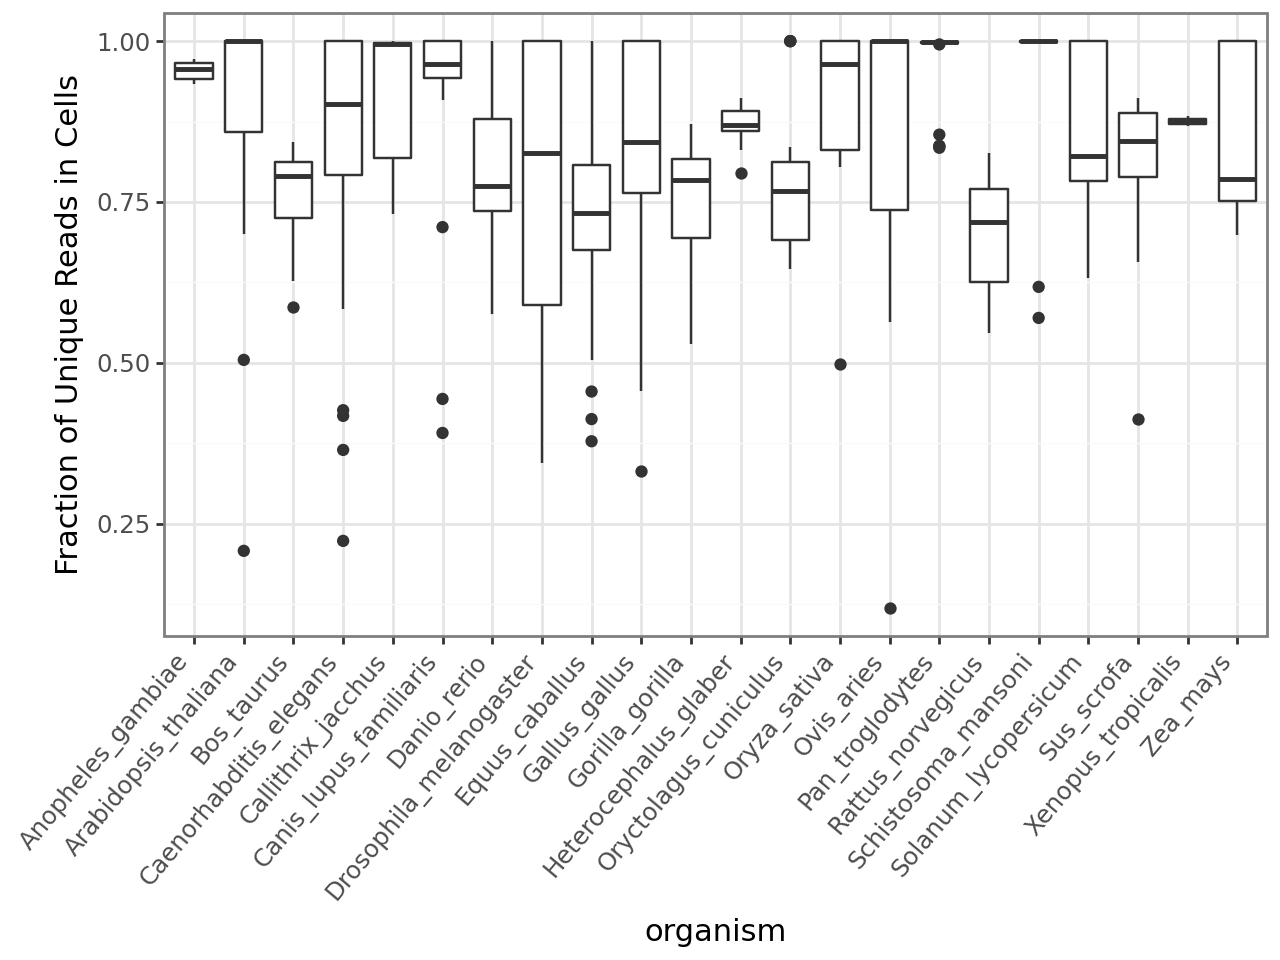

In [190]:
p = (
    pn.ggplot(df_star_params, pn.aes(x="organism", y="Fraction of Unique Reads in Cells")) +
    pn.geom_boxplot() + 
    pn.theme(
        axis_text_x=pn.element_text(rotation=50, hjust=1)
    )
)
p

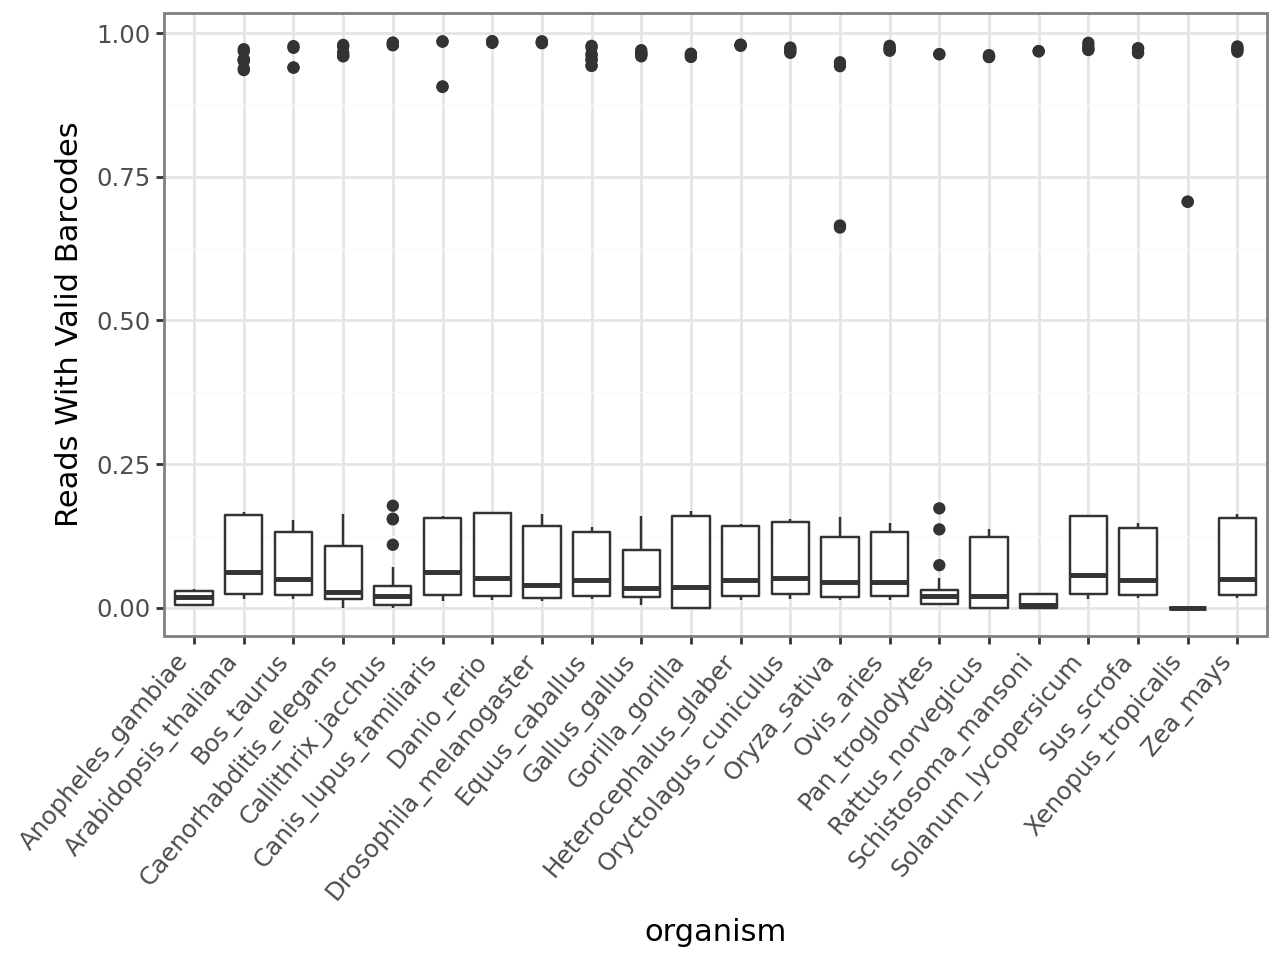

In [191]:
p = (
    pn.ggplot(df_star_params, pn.aes(x="organism", y="Reads With Valid Barcodes")) +
    pn.geom_boxplot() + 
    pn.theme(
        axis_text_x=pn.element_text(rotation=50, hjust=1)
    )
)
p

### Selected "best" STAR params

In [192]:
df_star_params_f = df_star_params[df_star_params["Best parameters"] == True]
df_star_params_f

,sample,accession,strand,barcodes_name,barcodes_file,cell_barcode_length,umi_length,organism,star_index,Estimated Number of Cells,...,Total GeneFull Detected,UMIs in Cells,Unique Reads in Cells Mapped to GeneFull,read1_length,read2_length,spot_count,base_count,file_size_gb,Total Estimated Number of Cells,Best parameters
7,SRX22195232,SRR26491369,Forward,3M-february-2018,/common_datasets/external/references/cellrange...,16,12,Danio_rerio,/scratch/multiomics/nickyoungblut/star_refs/Da...,1204.0,...,11685.0,367952.0,420642.0,150,150,85600857,25680257100,9.907145,9670,True
7,SRX19498738,SRR23614060,Forward,3M-february-2018,/common_datasets/external/references/cellrange...,16,12,Arabidopsis_thaliana,/scratch/multiomics/nickyoungblut/star_refs/Ar...,2412.0,...,9893.0,41584.0,54322.0,28,151,32104406,6388776794,1.945184,10455,True
9,SRX17820910,SRR21831760,Forward,3M-february-2018,/common_datasets/external/references/cellrange...,16,12,Canis_lupus_familiaris,/scratch/multiomics/nickyoungblut/star_refs/Ca...,3338.0,...,12126.0,696149.0,697236.0,250,250,56956347,28478173500,14.761229,190120,True
7,SRX15090986,SRR19019100,Forward,3M-february-2018,/common_datasets/external/references/cellrange...,16,12,Solanum_lycopersicum,/scratch/multiomics/nickyoungblut/star_refs/So...,9850.0,...,13315.0,236553.0,269871.0,150,150,86136379,25840913700,9.925108,79665,True
5,SRX22722562,SRR27030753,Forward,3M-february-2018,/common_datasets/external/references/cellrange...,16,12,Sus_scrofa,/scratch/multiomics/nickyoungblut/star_refs/Su...,6017.0,...,13247.0,178585.0,231516.0,150,150,129796999,38939099700,14.856524,26396,True
4,SRX19992927,SRR24196182,Forward,3M-february-2018,/common_datasets/external/references/cellrange...,16,12,Bos_taurus,/scratch/multiomics/nickyoungblut/star_refs/Bo...,3767.0,...,13457.0,554467.0,626412.0,28,90,100802801,13910786538,4.337631,32828,True
8,SRX24172447,SRR28572865,Forward,3M-february-2018,/common_datasets/external/references/cellrange...,16,12,Drosophila_melanogaster,/scratch/multiomics/nickyoungblut/star_refs/Dr...,1684.0,...,8811.0,256760.0,315045.0,151,151,1432945993,432749689886,167.730552,9109,True
7,SRX19052018,SRR23099822,Forward,3M-february-2018,/common_datasets/external/references/cellrange...,16,12,Zea_mays,/scratch/multiomics/nickyoungblut/star_refs/Ze...,4731.0,...,19490.0,471091.0,480886.0,28,55,227898016,18915535328,8.213934,234406,True
8,SRX20684355,SRR24923839,Forward,3M-february-2018,/common_datasets/external/references/cellrange...,16,12,Caenorhabditis_elegans,/scratch/multiomics/nickyoungblut/star_refs/Ca...,3050.0,...,10122.0,400185.0,434703.0,151,151,201059439,60719950578,24.061483,38689,True
4,SRX22985906,SRR27308612,Forward,3M-february-2018,/common_datasets/external/references/cellrange...,16,12,Oryza_sativa,/scratch/multiomics/nickyoungblut/star_refs/Or...,9969.0,...,15197.0,370930.0,385748.0,28,90,168247550,23218161900,7.288197,259645,True


In [193]:
# missing organisms?
df_input[~df_input["organism"].isin(df_star_params_f["organism"])].sort_values("organism")  #[["organism"]].drop_duplicates()

,sample,accession,entrez_id,organism
0,SRX20288331,SRR24503416,27709479,Anopheles_gambiae
20,ERX5927607,ERR6295317,15346129,Xenopus_tropicalis


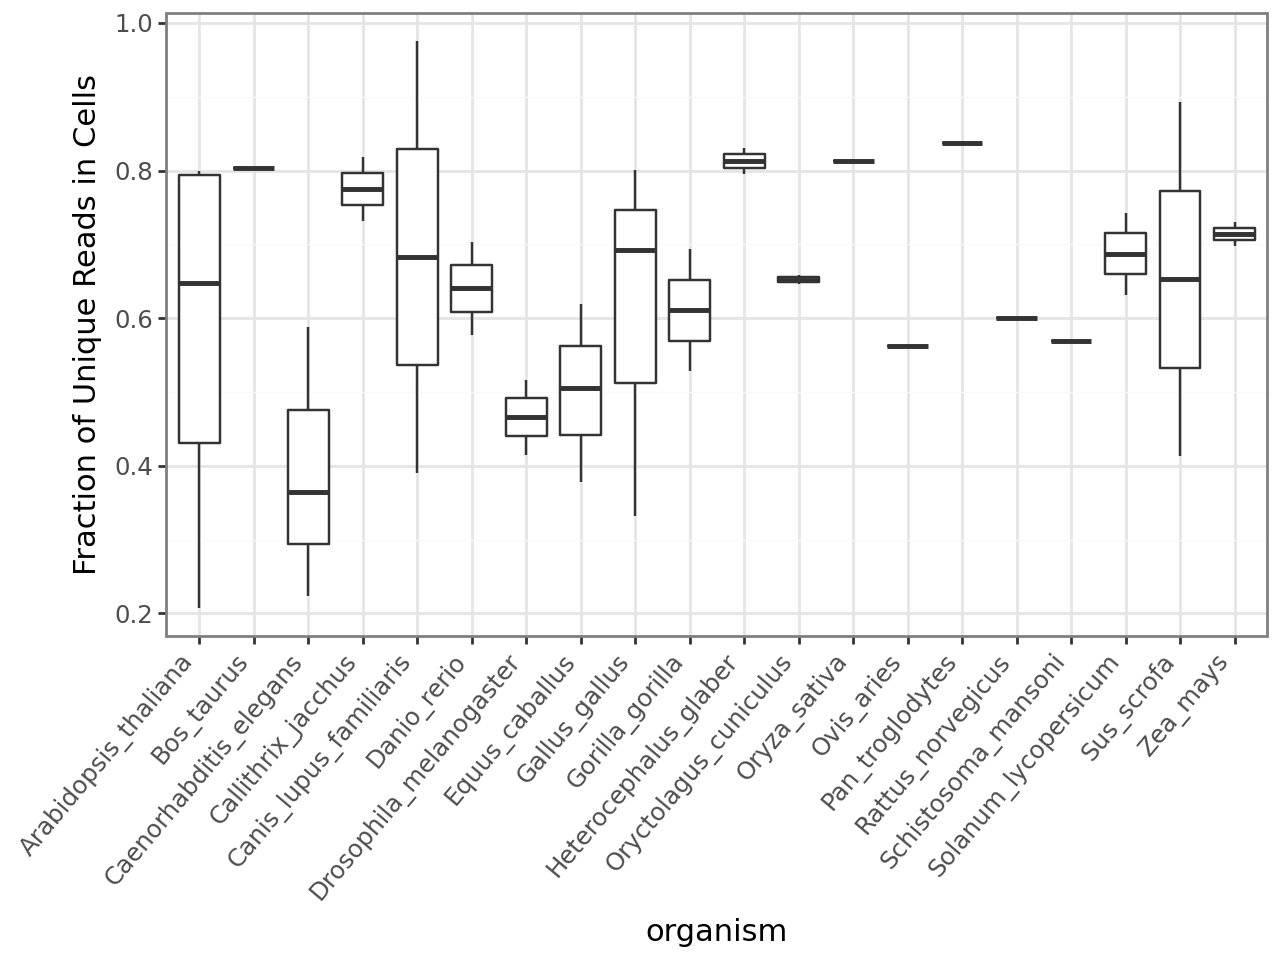

In [194]:
p = (
    pn.ggplot(df_star_params_f, pn.aes(x="organism", y="Fraction of Unique Reads in Cells")) +
    pn.geom_boxplot() + 
    pn.theme(
        axis_text_x=pn.element_text(rotation=50, hjust=1)
    )
)
p

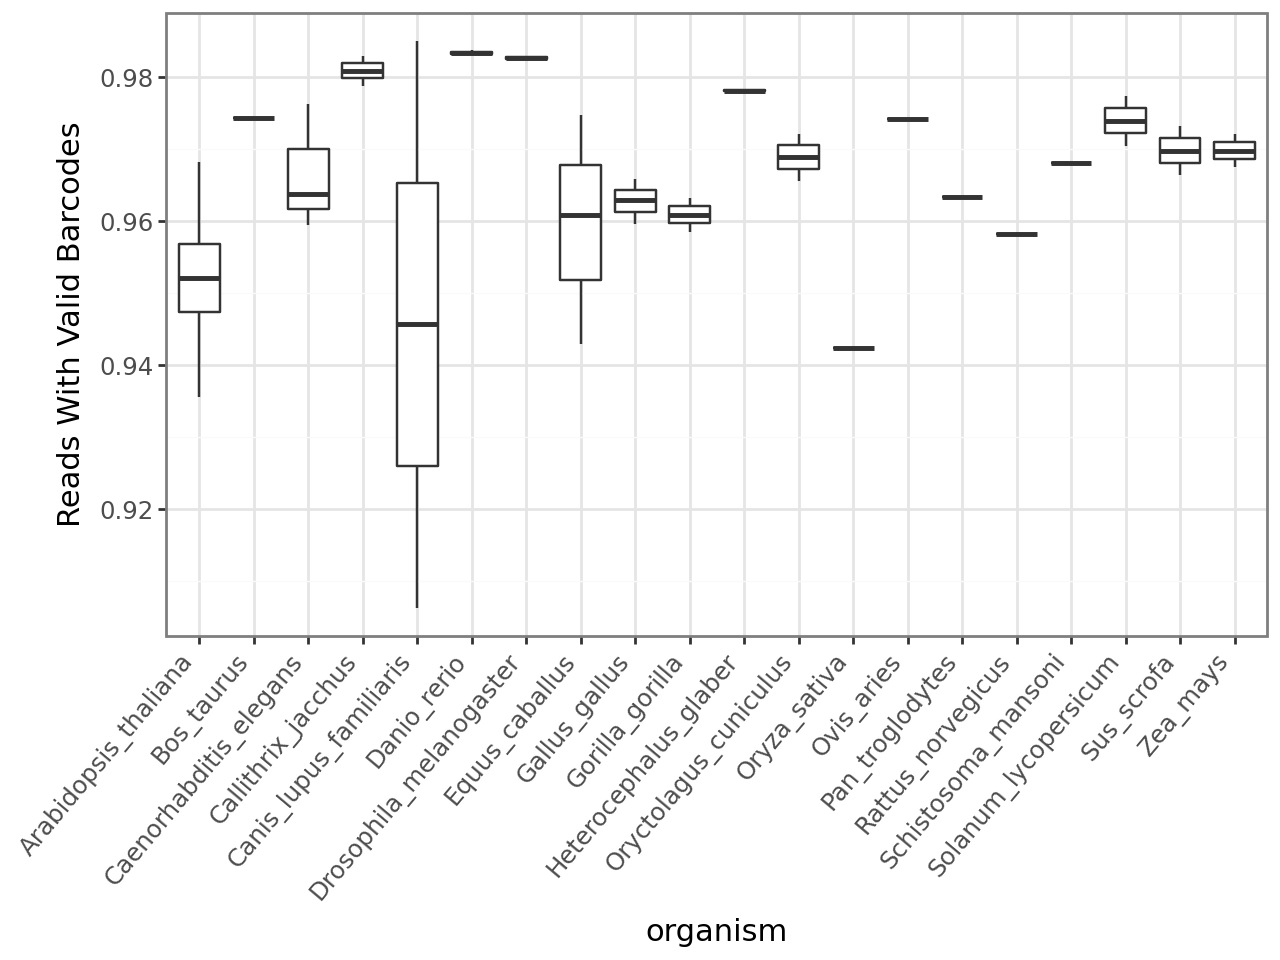

In [195]:
p = (
    pn.ggplot(df_star_params_f, pn.aes(x="organism", y="Reads With Valid Barcodes")) +
    pn.geom_boxplot() + 
    pn.theme(
        axis_text_x=pn.element_text(rotation=50, hjust=1)
    )
)
p

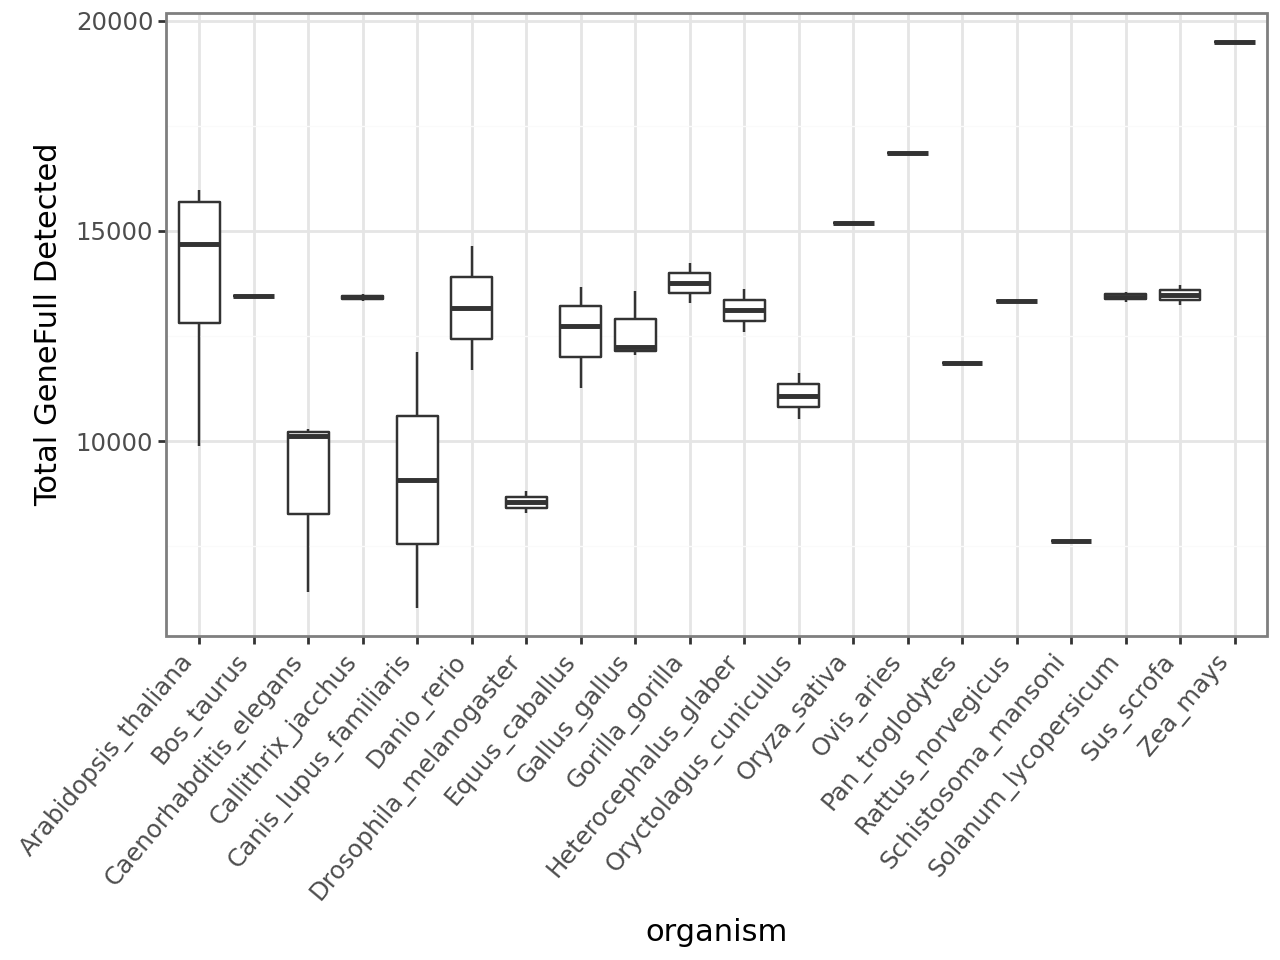

In [196]:
p = (
    pn.ggplot(df_star_params_f, pn.aes(x="organism", y="Total GeneFull Detected")) +
    pn.geom_boxplot() + 
    pn.theme(
        axis_text_x=pn.element_text(rotation=50, hjust=1)
    )
)
p


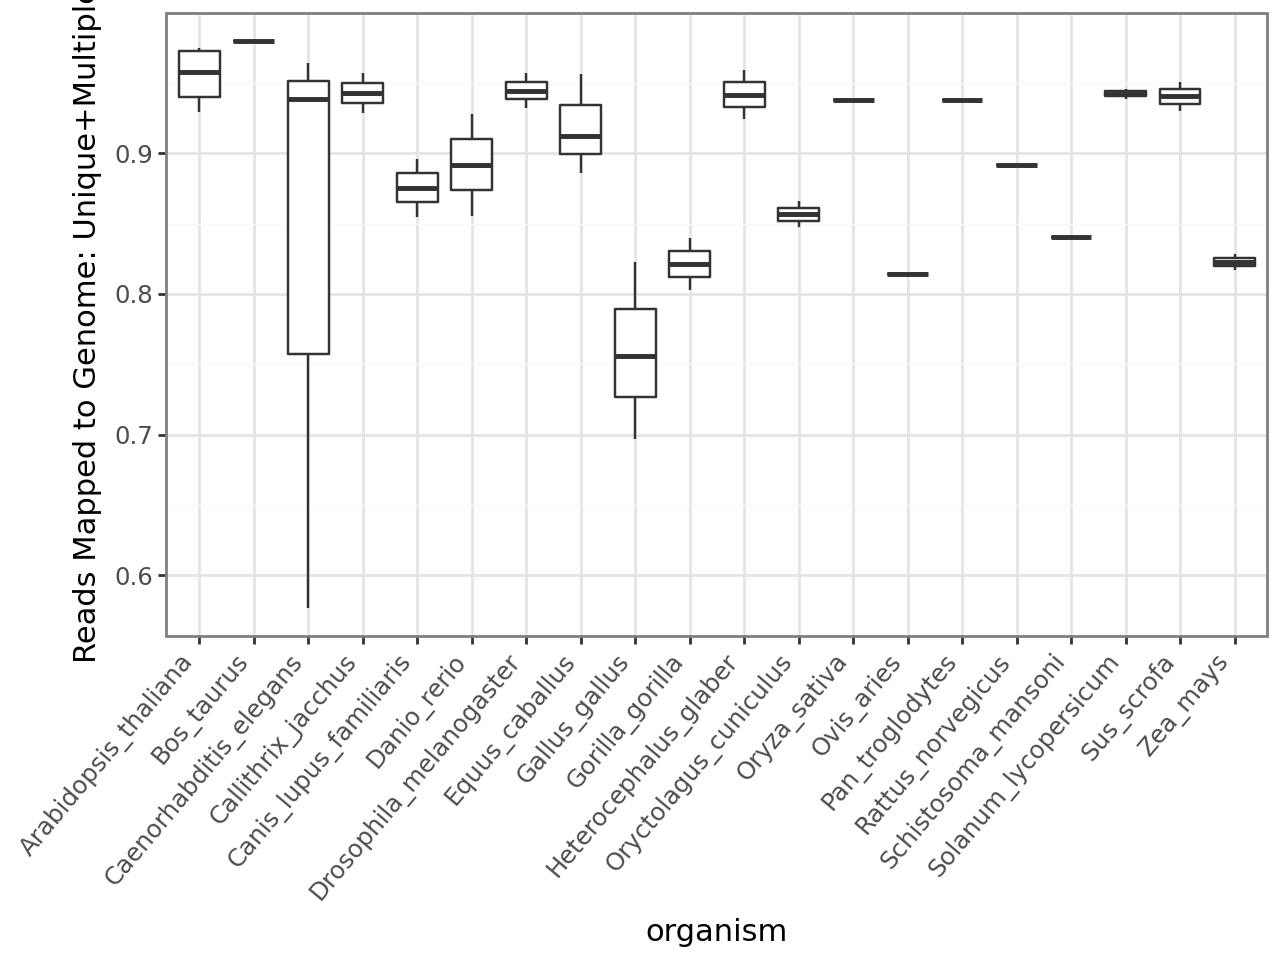

In [198]:
p = (
    pn.ggplot(df_star_params_f, pn.aes(x="organism", y="Reads Mapped to Genome: Unique+Multiple")) +
    pn.geom_boxplot() + 
    pn.theme(
        axis_text_x=pn.element_text(rotation=50, hjust=1)
    )
)
p


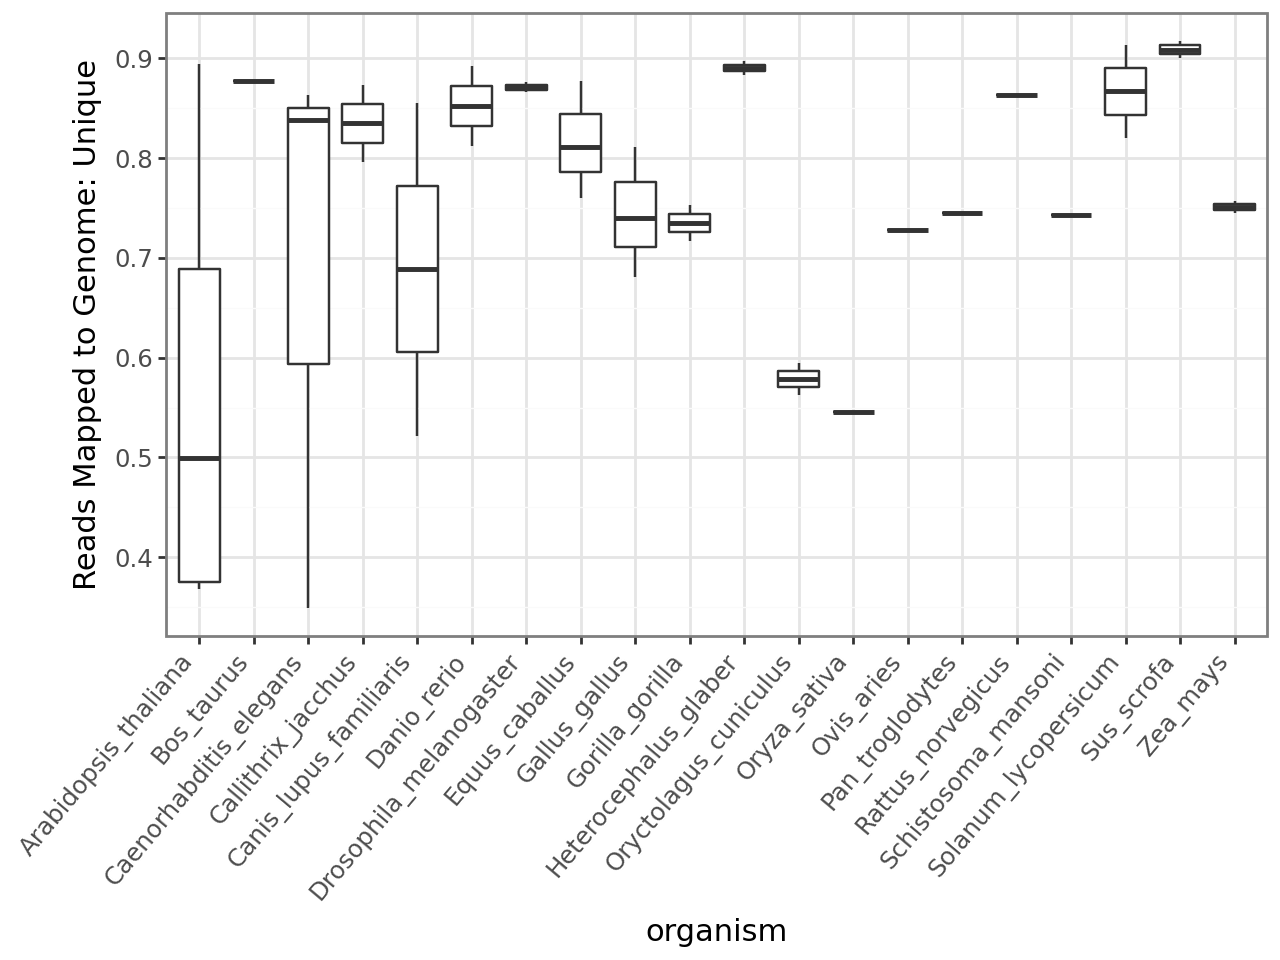

In [199]:
p = (
    pn.ggplot(df_star_params_f, pn.aes(x="organism", y="Reads Mapped to Genome: Unique")) +
    pn.geom_boxplot() + 
    pn.theme(
        axis_text_x=pn.element_text(rotation=50, hjust=1)
    )
)
p

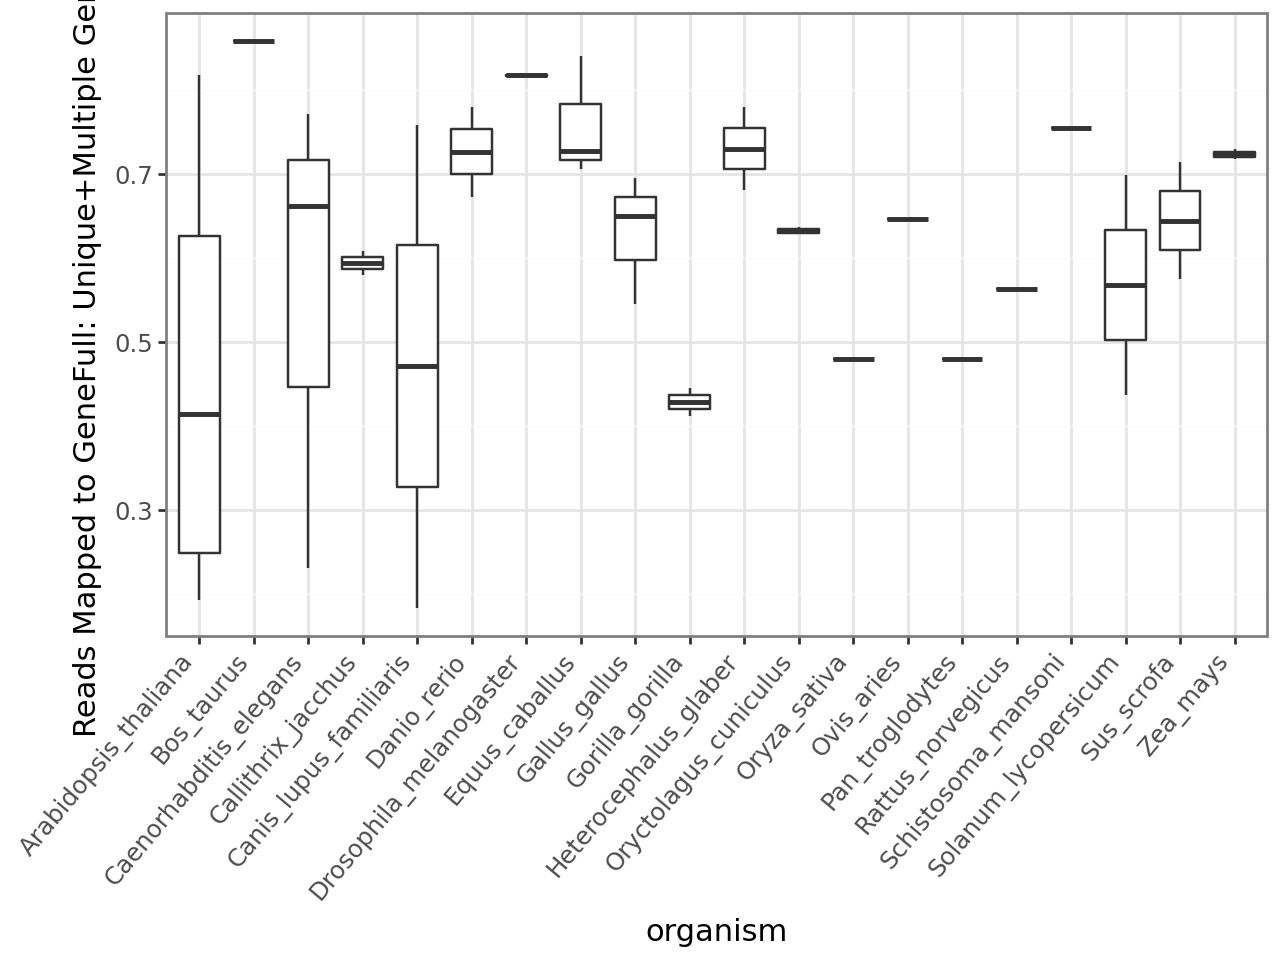

In [203]:
p = (
    pn.ggplot(df_star_params_f, pn.aes(x="organism", y="Reads Mapped to GeneFull: Unique+Multiple GeneFull")) +
    pn.geom_boxplot() + 
    pn.theme(
        axis_text_x=pn.element_text(rotation=50, hjust=1)
    )
)
p

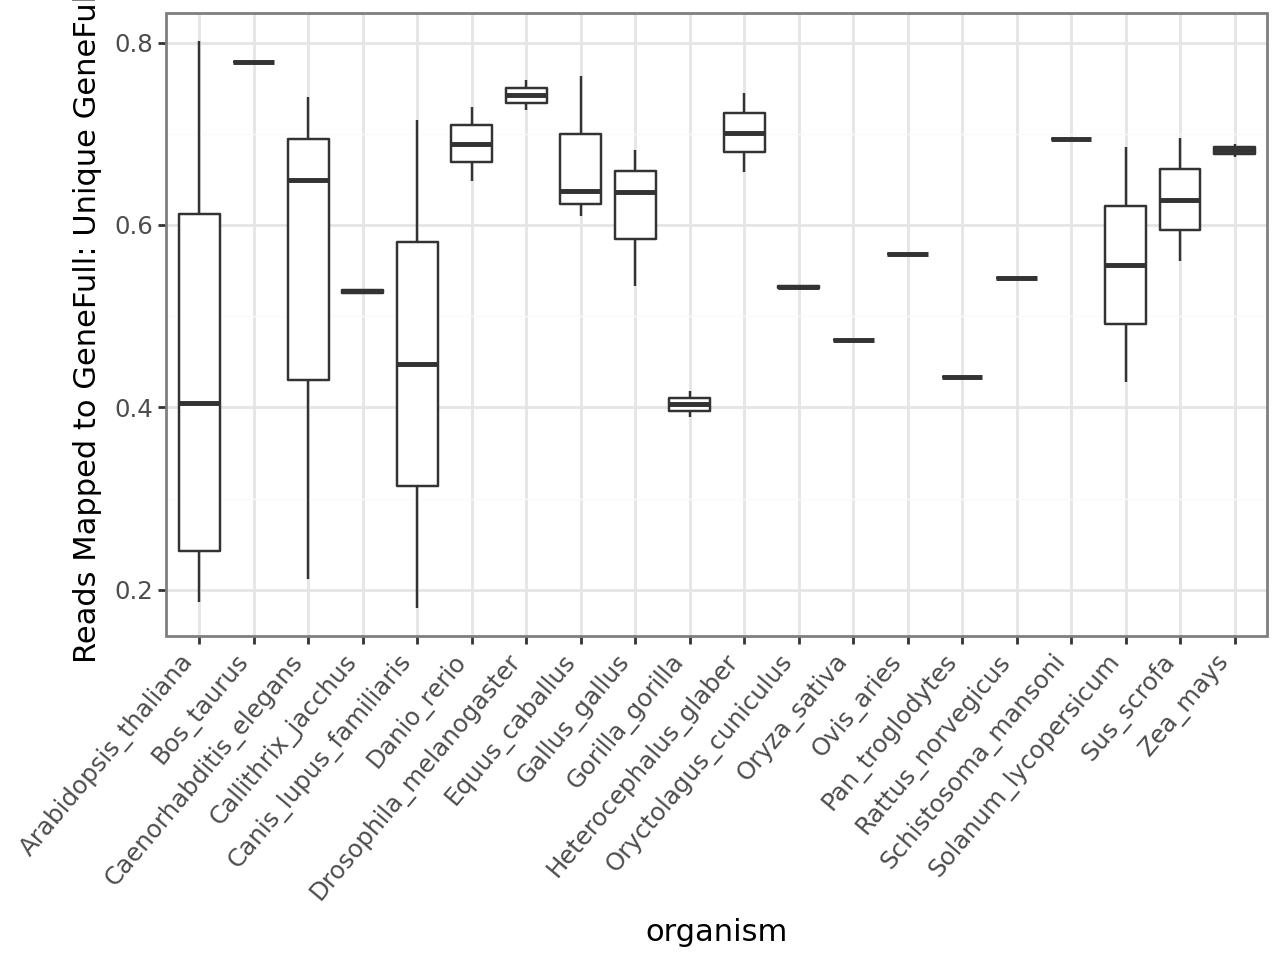

In [204]:
p = (
    pn.ggplot(df_star_params_f, pn.aes(x="organism", y="Reads Mapped to GeneFull: Unique GeneFull")) +
    pn.geom_boxplot() + 
    pn.theme(
        axis_text_x=pn.element_text(rotation=50, hjust=1)
    )
)
p

# sessionInfo

In [205]:
!conda list

# packages in environment at /home/nickyoungblut/miniforge3/envs/tiledb:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
aiobotocore               2.19.0                   pypi_0    pypi
aiohappyeyeballs          2.4.4              pyhd8ed1ab_1    conda-forge
aiohttp                   3.11.11         py312h178313f_0    conda-forge
aioitertools              0.12.0                   pypi_0    pypi
aiosignal                 1.3.2              pyhd8ed1ab_0    conda-forge
anndata                   0.11.3             pyhd8ed1ab_0    conda-forge
array-api-compat          1.10.0             pyhd8ed1ab_0    conda-forge
asttokens                 3.0.0              pyhd8ed1ab_1    conda-forge
attrs                     25.1.0             pyh71513ae_0    conda-forge
aws-c-auth                0.8.1                h205f482_0    conda-fo